In [ ]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ipl.csv to ipl.csv


In [ ]:
import io
df_ipl = pd.read_csv(io.BytesIO(uploaded['ipl.csv']))

# Data Exploration

In [ ]:
df_ipl.shape

(76014, 15)

In [ ]:
df_ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
df_ipl.style.bar(subset=['bat_team'])

ValueError: ignored

In [ ]:
df_ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [ ]:
df_ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


# Data Cleaning

In [ ]:
df_ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
# Remove unwanted columns which are not required for further process
print("Datset before removing: {}".format(df_ipl.shape))
df_ipl.drop(['mid','venue','batsman','bowler','striker','non-striker'], axis=1, inplace=True)
print("Datset after removing: {}".format(df_ipl.shape))

Datset before removing: (76014, 15)
Datset after removing: (76014, 9)


# Exploratory Data Analysis

In [ ]:
# First to check the team performance according to score
top_scorer_team = df_ipl.groupby('bat_team')['total'].count()
print(top_scorer_team)

bat_team
Chennai Super Kings             9142
Deccan Chargers                 5280
Delhi Daredevils                7152
Gujarat Lions                   1726
Kings XI Punjab                 9219
Kochi Tuskers Kerala             876
Kolkata Knight Riders           8033
Mumbai Indians                 10213
Pune Warriors                   2448
Rajasthan Royals                6643
Rising Pune Supergiant           994
Rising Pune Supergiants          741
Royal Challengers Bangalore     8331
Sunrisers Hyderabad             5216
Name: total, dtype: int64


In [ ]:
df_ipl['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

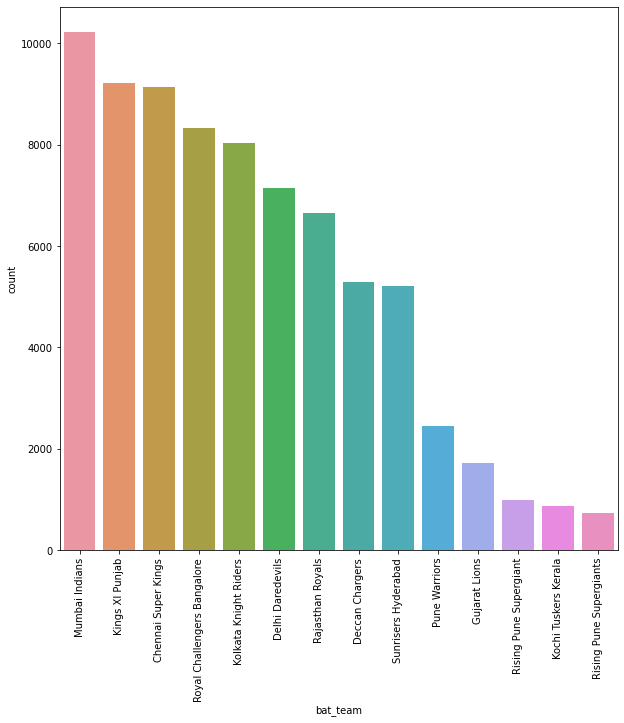

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data = df_ipl, x = df_ipl['bat_team'], order=df_ipl['bat_team'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Feature Engineering

In [ ]:
# We are considering only 9 top teams
top_scorer_team = ['Mumbai Indians','Kings XI Punjab','Chennai Super Kings','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils',
'Rajasthan Royals' ,'Deccan Chargers','Sunrisers Hyderabad']

In [ ]:
df_ipl = df_ipl[(df_ipl['bat_team'].isin(top_scorer_team)) & (df_ipl['bowl_team'].isin(top_scorer_team))]
print("Total values after removal of other teams: {}".format(df_ipl.shape))

Total values after removal of other teams: (62464, 9)


In [ ]:
# Convert 'Date' from string to Timestamp
from datetime import datetime
df_ipl['date'] = df_ipl['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

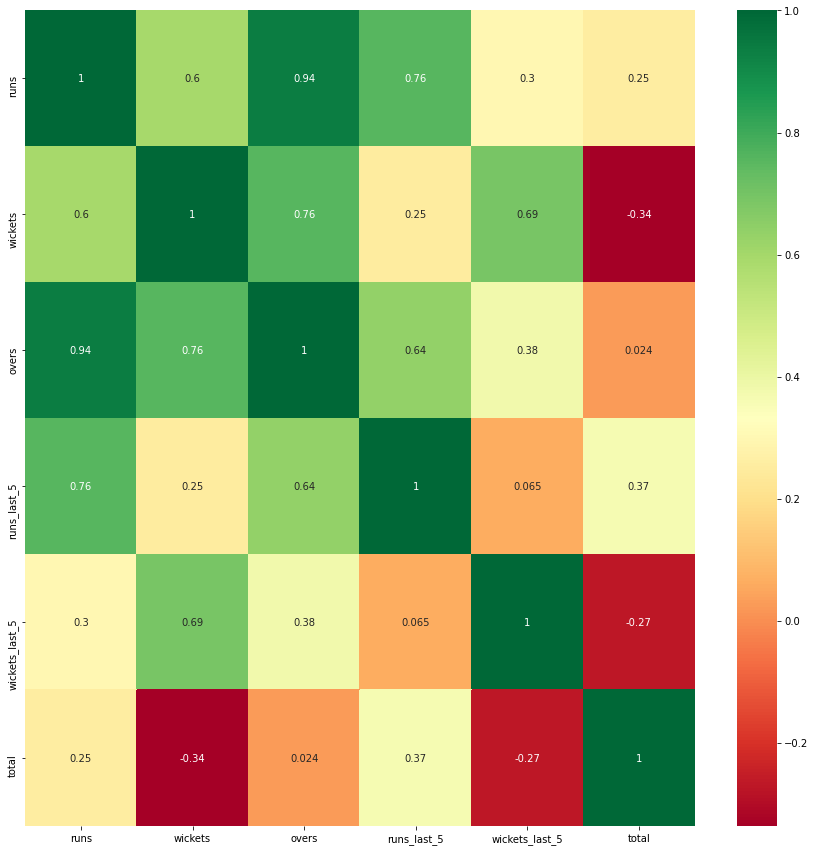

In [ ]:
# check correlation with variables
corr = df_ipl.corr()
plt.figure(figsize=(15,15))
corr_plot = sns.heatmap(data=corr, annot=True, cmap='RdYlGn')

# Data Preprocessing

In [ ]:
# make dummy variables for categorical variables
new_df_ipl = pd.get_dummies(data=df_ipl, columns=['bat_team','bowl_team'])
new_df_ipl.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Deccan Chargers',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Deccan Chargers', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
# Train & Test dataset Split 
x = new_df_ipl.drop(['total'], axis=1)
y = new_df_ipl['total']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
print("train set size: {} and test set size : {}".format(x_train.shape, x_test.shape))

train set size: (43724, 24) and test set size : (18740, 24)


In [ ]:
x_train.drop(['date'], axis=1, inplace=True)
x_test.drop(['date'], axis= 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model Evaluation
TRy on 3 algorithms to check accuracy level:
1. Linear Regression
2. Decision Tree Regressor
3. Random Forest Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
reg_lr = LinearRegression();
reg_dt = DecisionTreeRegressor();
reg_rf = RandomForestRegressor();


In [ ]:
reg_lr.fit(x_train,y_train);
reg_dt.fit(x_train,y_train);
reg_rf.fit(x_train,y_train);

In [ ]:
# Predicting Results
y_pred_lr = reg_lr.predict(x_test);
y_pred_dt = reg_dt.predict(x_test);
y_pred_rf = reg_rf.predict(x_test);

In [ ]:
# Linear Regression: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("MEAN ABSOLUTR ERROR: {}".format(mean_absolute_error(y_test, y_pred_lr)))
print("MEAN ABSOLUTR ERROR: {}".format(mean_squared_error(y_test, y_pred_lr)))
print("MEAN ABSOLUTR ERROR: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr))))

MEAN ABSOLUTR ERROR: 15.044192435240644
MEAN ABSOLUTR ERROR: 405.4234175631603
MEAN ABSOLUTR ERROR: 20.1351289432961


In [ ]:
# Decision Tree Regression: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("MEAN ABSOLUTR ERROR: {}".format(mean_absolute_error(y_test, y_pred_dt)))
print("MEAN ABSOLUTR ERROR: {}".format(mean_squared_error(y_test, y_pred_dt)))
print("MEAN ABSOLUTR ERROR: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_dt))))

MEAN ABSOLUTR ERROR: 7.551395410885806
MEAN ABSOLUTR ERROR: 309.42379732894585
MEAN ABSOLUTR ERROR: 17.590446194708814


In [ ]:
# Random Forest Regression: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
print("MEAN ABSOLUTR ERROR: {}".format(mean_absolute_error(y_test, y_pred_rf)))
print("MEAN ABSOLUTR ERROR: {}".format(mean_squared_error(y_test, y_pred_rf)))
print("MEAN ABSOLUTR ERROR: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))

MEAN ABSOLUTR ERROR: 7.462975769410086
MEAN ABSOLUTR ERROR: 176.36764946294605
MEAN ABSOLUTR ERROR: 13.280348243285868


*Since Random Forest gives better rather than other two so now we will boost the model performance by applying AdaBoost algorithm.*

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
reg_ad = AdaBoostRegressor(base_estimator = reg_rf, n_estimators =100)
reg_ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [ ]:
# Predicting Results
y_pred_ad = reg_ad.predict(x_test)

In [ ]:
# After Boosting Random Forest Regression: Model Evaluation
print("MEAN ABSOLUTR ERROR: {}".format(mean_absolute_error(y_test, y_pred_ad)))
print("MEAN ABSOLUTR ERROR: {}".format(mean_squared_error(y_test, y_pred_ad)))
print("MEAN ABSOLUTR ERROR: {}".format(np.sqrt(mean_squared_error(y_test, y_pred_ad))))

MEAN ABSOLUTR ERROR: 8.167156765035806
MEAN ABSOLUTR ERROR: 189.48615901795222
MEAN ABSOLUTR ERROR: 13.765397161649648


*No Such significant level error reduced after boosting so we will apply simple Random Forest for prediction.*